<a href="https://colab.research.google.com/github/richardkilea/BINARY-CLASSIFICATION-OF-SOFTWARE-DEFECTS/blob/main/Feature_Enginnnering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook i will load dataset and perfom feature engineering

In [96]:
# import libraries
import pandas as pd
import numpy as np

In [97]:
# load dataset and create dataframe
df = pd.read_csv('/content/clean_data_after_eda.csv')

# lets do some insights about our dataset

In [98]:
df.head() # dataset contains 44 colums

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [100]:
# lets transform the dates
df.date_activ = pd.DatetimeIndex(df.date_activ)
df.date_end  = pd.DatetimeIndex(df.date_end )
df.date_modif_prod = pd.DatetimeIndex(df.date_modif_prod)
df.date_renewal = pd.DatetimeIndex(df.date_renewal)


In [101]:
# lets view our dataframe again
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [102]:
df.sort_values(by=["date_activ","date_end", "date_modif_prod","date_renewal"], inplace=True, ascending=True)
print(df.date_activ.tail(20))

13753   2013-07-09
10521   2013-07-10
12911   2013-07-11
8886    2013-07-12
6898    2013-07-24
1494    2013-07-25
14485   2013-07-29
12855   2013-07-29
6177    2013-08-01
1815    2013-08-05
11306   2013-08-05
10131   2013-08-07
13825   2013-08-07
2520    2013-08-07
2228    2013-08-16
13233   2013-10-28
5741    2013-10-31
7612    2013-11-05
12550   2013-11-08
7023    2014-09-01
Name: date_activ, dtype: datetime64[ns]


In [103]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
2015,07abde2ff11ad3fb443963c17b333ef5,MISSING,44665,42649,3305,2003-05-09,2016-05-09,2003-05-09,2015-05-11,4011.00,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
6135,4e123188a83dd116ce6c3f9f9fb3ae6b,MISSING,42079,19268,0,2003-06-05,2016-06-05,2003-06-05,2015-06-08,4305.25,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
4431,60bdfb5dce845441972098b75cb9984f,MISSING,16815,0,1638,2003-06-11,2016-06-11,2003-06-11,2015-06-23,1811.46,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,1
7171,7de6f4ad91b03a376460ff9f3e6500ec,MISSING,40773,0,2501,2003-06-25,2016-06-25,2003-06-25,2015-06-26,4053.25,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
13760,87a87579c920ebcbaf4ccdb3f7db62d5,MISSING,41791,0,3440,2003-07-03,2016-07-03,2003-07-03,2015-07-04,4322.28,...,0.000010,0.000001,1.480067e-06,0.004423,0.001593,0.000708,0.004434,0.001594,7.093783e-04,0


# lets import the price data

In [104]:
price_df = pd.read_csv("/content/price_data (1).csv",
                 low_memory=False,
                 parse_dates=["price_date"])



In [105]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [106]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


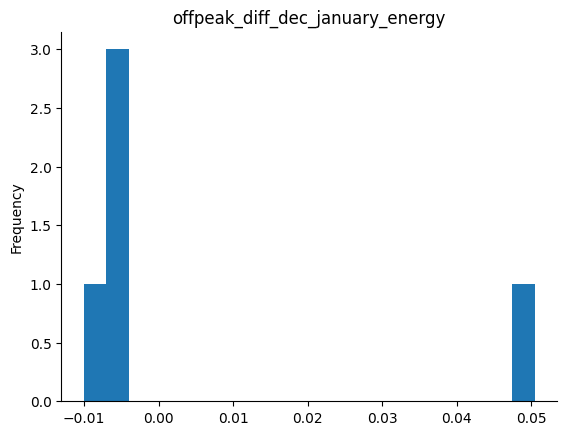

In [107]:
from matplotlib import pyplot as plt
_df_51['offpeak_diff_dec_january_energy'].plot(kind='hist', bins=20, title='offpeak_diff_dec_january_energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

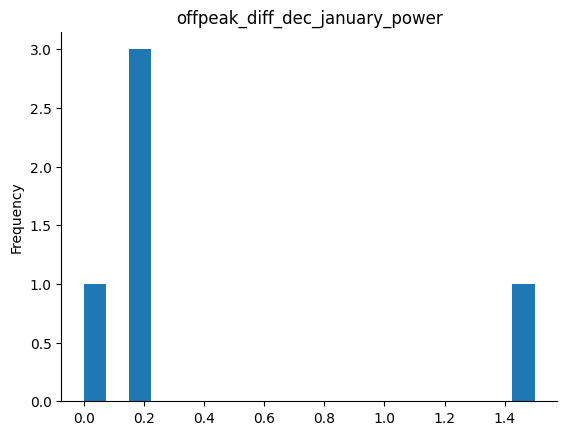

In [108]:
from matplotlib import pyplot as plt
_df_52['offpeak_diff_dec_january_power'].plot(kind='hist', bins=20, title='offpeak_diff_dec_january_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
2015,07abde2ff11ad3fb443963c17b333ef5,MISSING,44665,42649,3305,2003-05-09,2016-05-09,2003-05-09,2015-05-11,4011.00,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
6135,4e123188a83dd116ce6c3f9f9fb3ae6b,MISSING,42079,19268,0,2003-06-05,2016-06-05,2003-06-05,2015-06-08,4305.25,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
4431,60bdfb5dce845441972098b75cb9984f,MISSING,16815,0,1638,2003-06-11,2016-06-11,2003-06-11,2015-06-23,1811.46,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,1
7171,7de6f4ad91b03a376460ff9f3e6500ec,MISSING,40773,0,2501,2003-06-25,2016-06-25,2003-06-25,2015-06-26,4053.25,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
13760,87a87579c920ebcbaf4ccdb3f7db62d5,MISSING,41791,0,3440,2003-07-03,2016-07-03,2003-07-03,2015-07-04,4322.28,...,0.000010,0.000001,1.480067e-06,0.004423,0.001593,0.000708,0.004434,0.001594,7.093783e-04,0


In [110]:
df.drop(['channel_sales'], axis=1, inplace=True)

In [111]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
2015,07abde2ff11ad3fb443963c17b333ef5,44665,42649,3305,2003-05-09,2016-05-09,2003-05-09,2015-05-11,4011.00,3305,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
6135,4e123188a83dd116ce6c3f9f9fb3ae6b,42079,19268,0,2003-06-05,2016-06-05,2003-06-05,2015-06-08,4305.25,0,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
4431,60bdfb5dce845441972098b75cb9984f,16815,0,1638,2003-06-11,2016-06-11,2003-06-11,2015-06-23,1811.46,1638,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,1
7171,7de6f4ad91b03a376460ff9f3e6500ec,40773,0,2501,2003-06-25,2016-06-25,2003-06-25,2015-06-26,4053.25,2501,...,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0
13760,87a87579c920ebcbaf4ccdb3f7db62d5,41791,0,3440,2003-07-03,2016-07-03,2003-07-03,2015-07-04,4322.28,3440,...,0.000010,0.000001,1.480067e-06,0.004423,0.001593,0.000708,0.004434,0.001594,7.093783e-04,0


In [112]:
# perfom an average os twosimilar colums
df['average_var_price_peak'] = (df['var_year_price_peak_fix'] + df['var_year_price_peak']) / 2
print(df)

                                     id  cons_12m  cons_gas_12m  \
2015   07abde2ff11ad3fb443963c17b333ef5     44665         42649   
6135   4e123188a83dd116ce6c3f9f9fb3ae6b     42079         19268   
4431   60bdfb5dce845441972098b75cb9984f     16815             0   
7171   7de6f4ad91b03a376460ff9f3e6500ec     40773             0   
13760  87a87579c920ebcbaf4ccdb3f7db62d5     41791             0   
...                                 ...       ...           ...   
13233  49140cc6fdd00ce4b8f864347735d776     48676         31428   
5741   b607304ef05bf9556a49310c7ef4c600      4351        111849   
7612   ff0ba14787dc2cd65362db505bc41404     20656             0   
12550  985f3ff4ec4e61c5eee84fca79accb5b     21058             0   
7023   33bb3af90650ac2e9ecac6ff2c975a6b     25572             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
2015              3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
6135                 0 2003-06-05 2016-06

In [113]:
# create average 0f the mid_year_peak because var_year_price_mid_peak_fix and var_year_price_mid_peak are almos similar
df['average_mid_year_peak'] = (df['var_year_price_mid_peak_fix'] + df['var_year_price_mid_peak']) / 2
print(df)

                                     id  cons_12m  cons_gas_12m  \
2015   07abde2ff11ad3fb443963c17b333ef5     44665         42649   
6135   4e123188a83dd116ce6c3f9f9fb3ae6b     42079         19268   
4431   60bdfb5dce845441972098b75cb9984f     16815             0   
7171   7de6f4ad91b03a376460ff9f3e6500ec     40773             0   
13760  87a87579c920ebcbaf4ccdb3f7db62d5     41791             0   
...                                 ...       ...           ...   
13233  49140cc6fdd00ce4b8f864347735d776     48676         31428   
5741   b607304ef05bf9556a49310c7ef4c600      4351        111849   
7612   ff0ba14787dc2cd65362db505bc41404     20656             0   
12550  985f3ff4ec4e61c5eee84fca79accb5b     21058             0   
7023   33bb3af90650ac2e9ecac6ff2c975a6b     25572             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
2015              3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
6135                 0 2003-06-05 2016-06

In [114]:
# dropped the columns that have been merged and averaged
df.drop(['var_year_price_mid_peak_fix','var_year_price_peak_fix', 'var_year_price_mid_peak', 'var_year_price_peak'], axis=1, inplace=True)

In [116]:
# drop columns that have alot of null values
df.drop(['var_6m_price_peak_var', 'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_var'], axis=1, inplace=True)

In [117]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_year_price_off_peak,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,average_var_price_peak,average_mid_year_peak
2015,07abde2ff11ad3fb443963c17b333ef5,44665,42649,3305,2003-05-09,2016-05-09,2003-05-09,2015-05-11,4011.00,3305,...,0.007056,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0,0.002535,0.001127
6135,4e123188a83dd116ce6c3f9f9fb3ae6b,42079,19268,0,2003-06-05,2016-06-05,2003-06-05,2015-06-08,4305.25,0,...,0.007255,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0,0.002607,0.001159
4431,60bdfb5dce845441972098b75cb9984f,16815,0,1638,2003-06-11,2016-06-11,2003-06-11,2015-06-23,1811.46,1638,...,0.007255,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,1,0.002607,0.001159
7171,7de6f4ad91b03a376460ff9f3e6500ec,40773,0,2501,2003-06-25,2016-06-25,2003-06-25,2015-06-26,4053.25,2501,...,0.007255,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0,0.002607,0.001159
13760,87a87579c920ebcbaf4ccdb3f7db62d5,41791,0,3440,2003-07-03,2016-07-03,2003-07-03,2015-07-04,4322.28,3440,...,0.007054,0.004423,0.001593,0.000708,0.004434,0.001594,7.093783e-04,0,0.002535,0.001127
